# Decision Tree
- a tree-like model that illustrates  series of events leading to certain decisions
- A decision tree is a non-parametric supervised learning algorithm used  for both classification and regression tasks
- constructed by recursively splitting the training  data into subsets based on values of the attributes
- has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes
- each node represents a test on an attribute and each branch is an outcome of that test

Decision Tree Terminologies
- Root Node:
    - also called as Parent Node
    - the node from where tree starts
    - represents the entire dataset, which further gets divided into homogeneous sets
- Child Node:
    - all the nodes other than parent node
- leaf node:
    - final output node
- splitting:
    - process of dividing the decision node / root node into sub-nodes according to the given conditions
- Branch / Sub-Tree :
    - tree formed by splitting the tree
- Pruning:
    - process of removing the unwanted branches from the tree


Advantages of Decision Tree
- **Easy to interpret**: The Boolean logic and visual representations of decision trees make them easier to understand and consume. The hierarchical nature of a decision tree also makes it easy to see which attributes are most important, which isn’t always clear with other algorithms, like neural networks.

- **Little to no data preparation required**: Decision trees have a number of characteristics, which make it more flexible than other classifiers. It can handle various data types—i.e. discrete or continuous values, and continuous values can be converted into categorical values through the use of thresholds. Additionally, it can also handle values with missing values, which can be problematic for other classifiers, like Naïve Bayes.  

- **More flexible**: Decision trees can be leveraged for both classification and regression tasks, making it more flexible than some other algorithms. It’s also insensitive to underlying relationships between attributes; this means that if two variables are highly correlated, the algorithm will only choose one of the features to split on.

Disadvantages of Decision Tree
- **Prone to overfitting**: Complex decision trees tend to overfit and do not generalize well to new data. This scenario can be avoided through the processes of pre-pruning or post-pruning. Pre-pruning halts tree growth when there is insufficient data while post-pruning removes subtrees with inadequate data after tree construction.

- **High variance estimators**: Small variations within data can produce a very different decision tree. Bagging, or the averaging of estimates, can be a method of reducing variance of decision trees. However, this approach is limited as it can lead to highly correlated predictors.  

- **More costly**: Given that decision trees take a greedy search approach during construction, they can be more expensive to train compared to other algorithms.

- **Not fully supported in scikit-learn**:  Scikit-learn is a popular machine learning library based in Python. While this library does have a Decision Tree module (DecisionTreeClassifier, link resides outside of ibm.com), the current implementation does not support categorical variables.


# Attribute Selection Measure (ASM)
- technique to select the best attribute for the root node and sub-nodes
- two techniques include
    - information Gain
        - is the expected reduction in entropy due to splitting on values of attribute ```a```
        - measurement of changes in entropy (randomness) after segmentation of a dataset based on an attribute
        - calculates how much information a feature provides us about a class
        - select the attribute with highest information gain
        - ```Gain (T, X)``` = ```Entropy(T) - Entropy(T, X)```
        - ID3 algorithm is run recursively on the non-leaf branchesm, until all the data is classified
        - ```Best attribute``` = ```Highest information Gain```
    - Gini Index / Impurity
        - measures how often a randomly choosen example would be incorrectly labeled if it was randomly labeled according to the label distribution
        - ```Gini(X)``` = ```1 - Σpi ^2```
            - ```pi``` is the proportion of elements  of class ```i```
        - can be used as an alternative to entropy for selecting attributes
        - ```Best attribute``` = ```Highest impurity decrease```
- Entropy / information Gain and Gini Impurity give similar results in practice, Entropy might be slower to claculate because of the log

# Entropy
- metric to measure the impurity in a given attribute
- specifies degree of randomness
- branch with entropy of 0 is the leaf node
- Lower Entropy implies great predictability
- Entropy, ```E(s)``` = ```- P(yes)log2 P(yes) - P(no)log2 P(no)```
    - ```s``` : total number of samples
    - ```P(yes)``` : Probability of yes
    - ```P(no)``` : Probability of no
- Entropy, ```E(s)``` = ```Σ -pi log2 pi```
    - ```pi``` is the proportion of elements of class ```i```
    
- Entropy, ```E(T, X)``` = ```ΣP(c)E(c)```

# Overfitting and Tree Pruning
- an induced tree might overfit the training data
    - too many branches, some may reflect anomalies due to noise or outliers
    - poor accuracy for unseen samples
- two approcahes to avoid overfitting
    - Pre-Pruning
        - Halt tree construction early, do not split node if this would result in the goodness measure falling below a threshold
        - difficult to choose an appropriate threshold
    - Post-Pruning
        - remove branches from a "fully-grown" tree , get a sequence of progressively pruned trees
        - use a set of data different from the training data to decide which is the "best pruned tree"

#  Decision Boundaries
- boundary separating data set into different classes
- Decision tree produce non-linear decision boundaries

## Decision Tree Classifier

### import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset

In [2]:
# from google.colab import files
# uploaded = files.upload()
# D9data3.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [3]:
dataset = pd.read_csv('D9data3.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.shape

(400, 3)

In [5]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


### Identify X & Y

In [7]:
x = dataset.iloc[ : , :-1].values
# independent vars
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [8]:
y = dataset.iloc[ : , -1].values
# dependent vars
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Splitting

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [11]:
x_train[:5]

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000]], dtype=int64)

In [12]:
y_train[:5]

array([0, 1, 0, 1, 1], dtype=int64)

### Pre-Processing

##### Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
x_train = sc.fit_transform(x_train)
x_train[:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [16]:
x_test = sc.fit_transform(x_test)
x_test[:5]

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566]])

### Modeling

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

### Training

In [19]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Prediction

In [20]:
classifier.predict(sc.transform([[40, 97000]]))
# prediction with custom predictors,
# such predictors need to be transformed first

array([1], dtype=int64)

In [21]:
classifier.predict(sc.transform([[19, 19000]]))
# prediction with custom predictors which are known from training dataset,
# shows overfitting as it is known case from training data

array([0], dtype=int64)

In [22]:
y_pred_dt = classifier.predict(x_test)
y_pred_dt[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation for classifier

#### confusion_matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test, y_pred_dt)

array([[61,  7],
       [ 3, 29]], dtype=int64)

#### classification_report

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        68
           1       0.81      0.91      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.90      0.89       100
weighted avg       0.91      0.90      0.90       100



#### accuracy_score

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test, y_pred_dt)

0.9

#### precision_score

In [29]:
from sklearn.metrics import precision_score

In [30]:
precision_score(y_test, y_pred_dt)

0.8055555555555556

#### recall_score

In [31]:
from sklearn.metrics import recall_score

In [32]:
recall_score(y_test, y_pred_dt)

0.90625

### Visualization

#### Contour Plots

In [33]:
from matplotlib.colors import ListedColormap

C:\Users\surya\AppData\Local\Temp\ipykernel_22596\3096876786.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


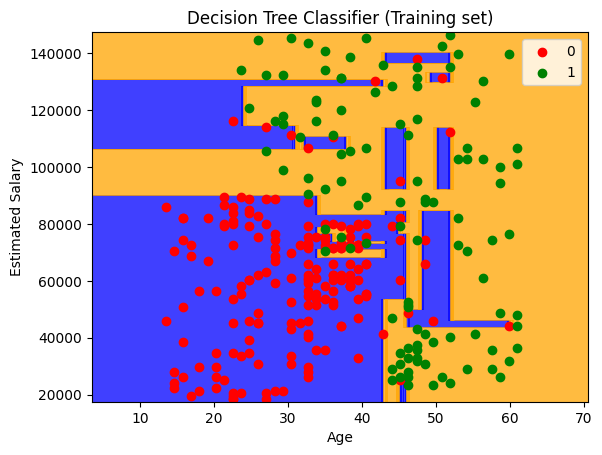

In [34]:
x_set, y_set = sc.inverse_transform(x_train), y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\surya\AppData\Local\Temp\ipykernel_22596\3318211249.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


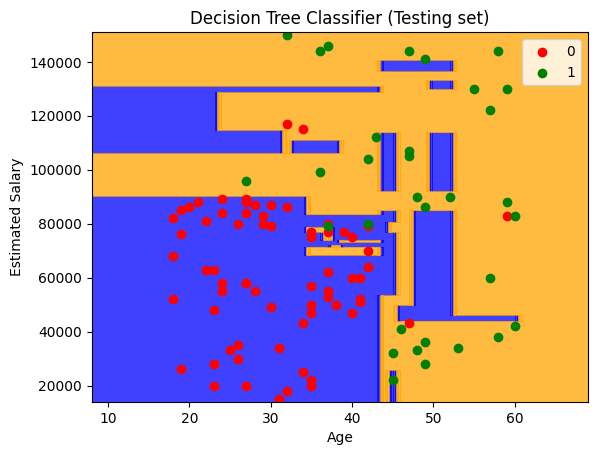

In [35]:
x_set, y_set = sc.inverse_transform(x_test), y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#### Tree plot

In [36]:
from sklearn import tree

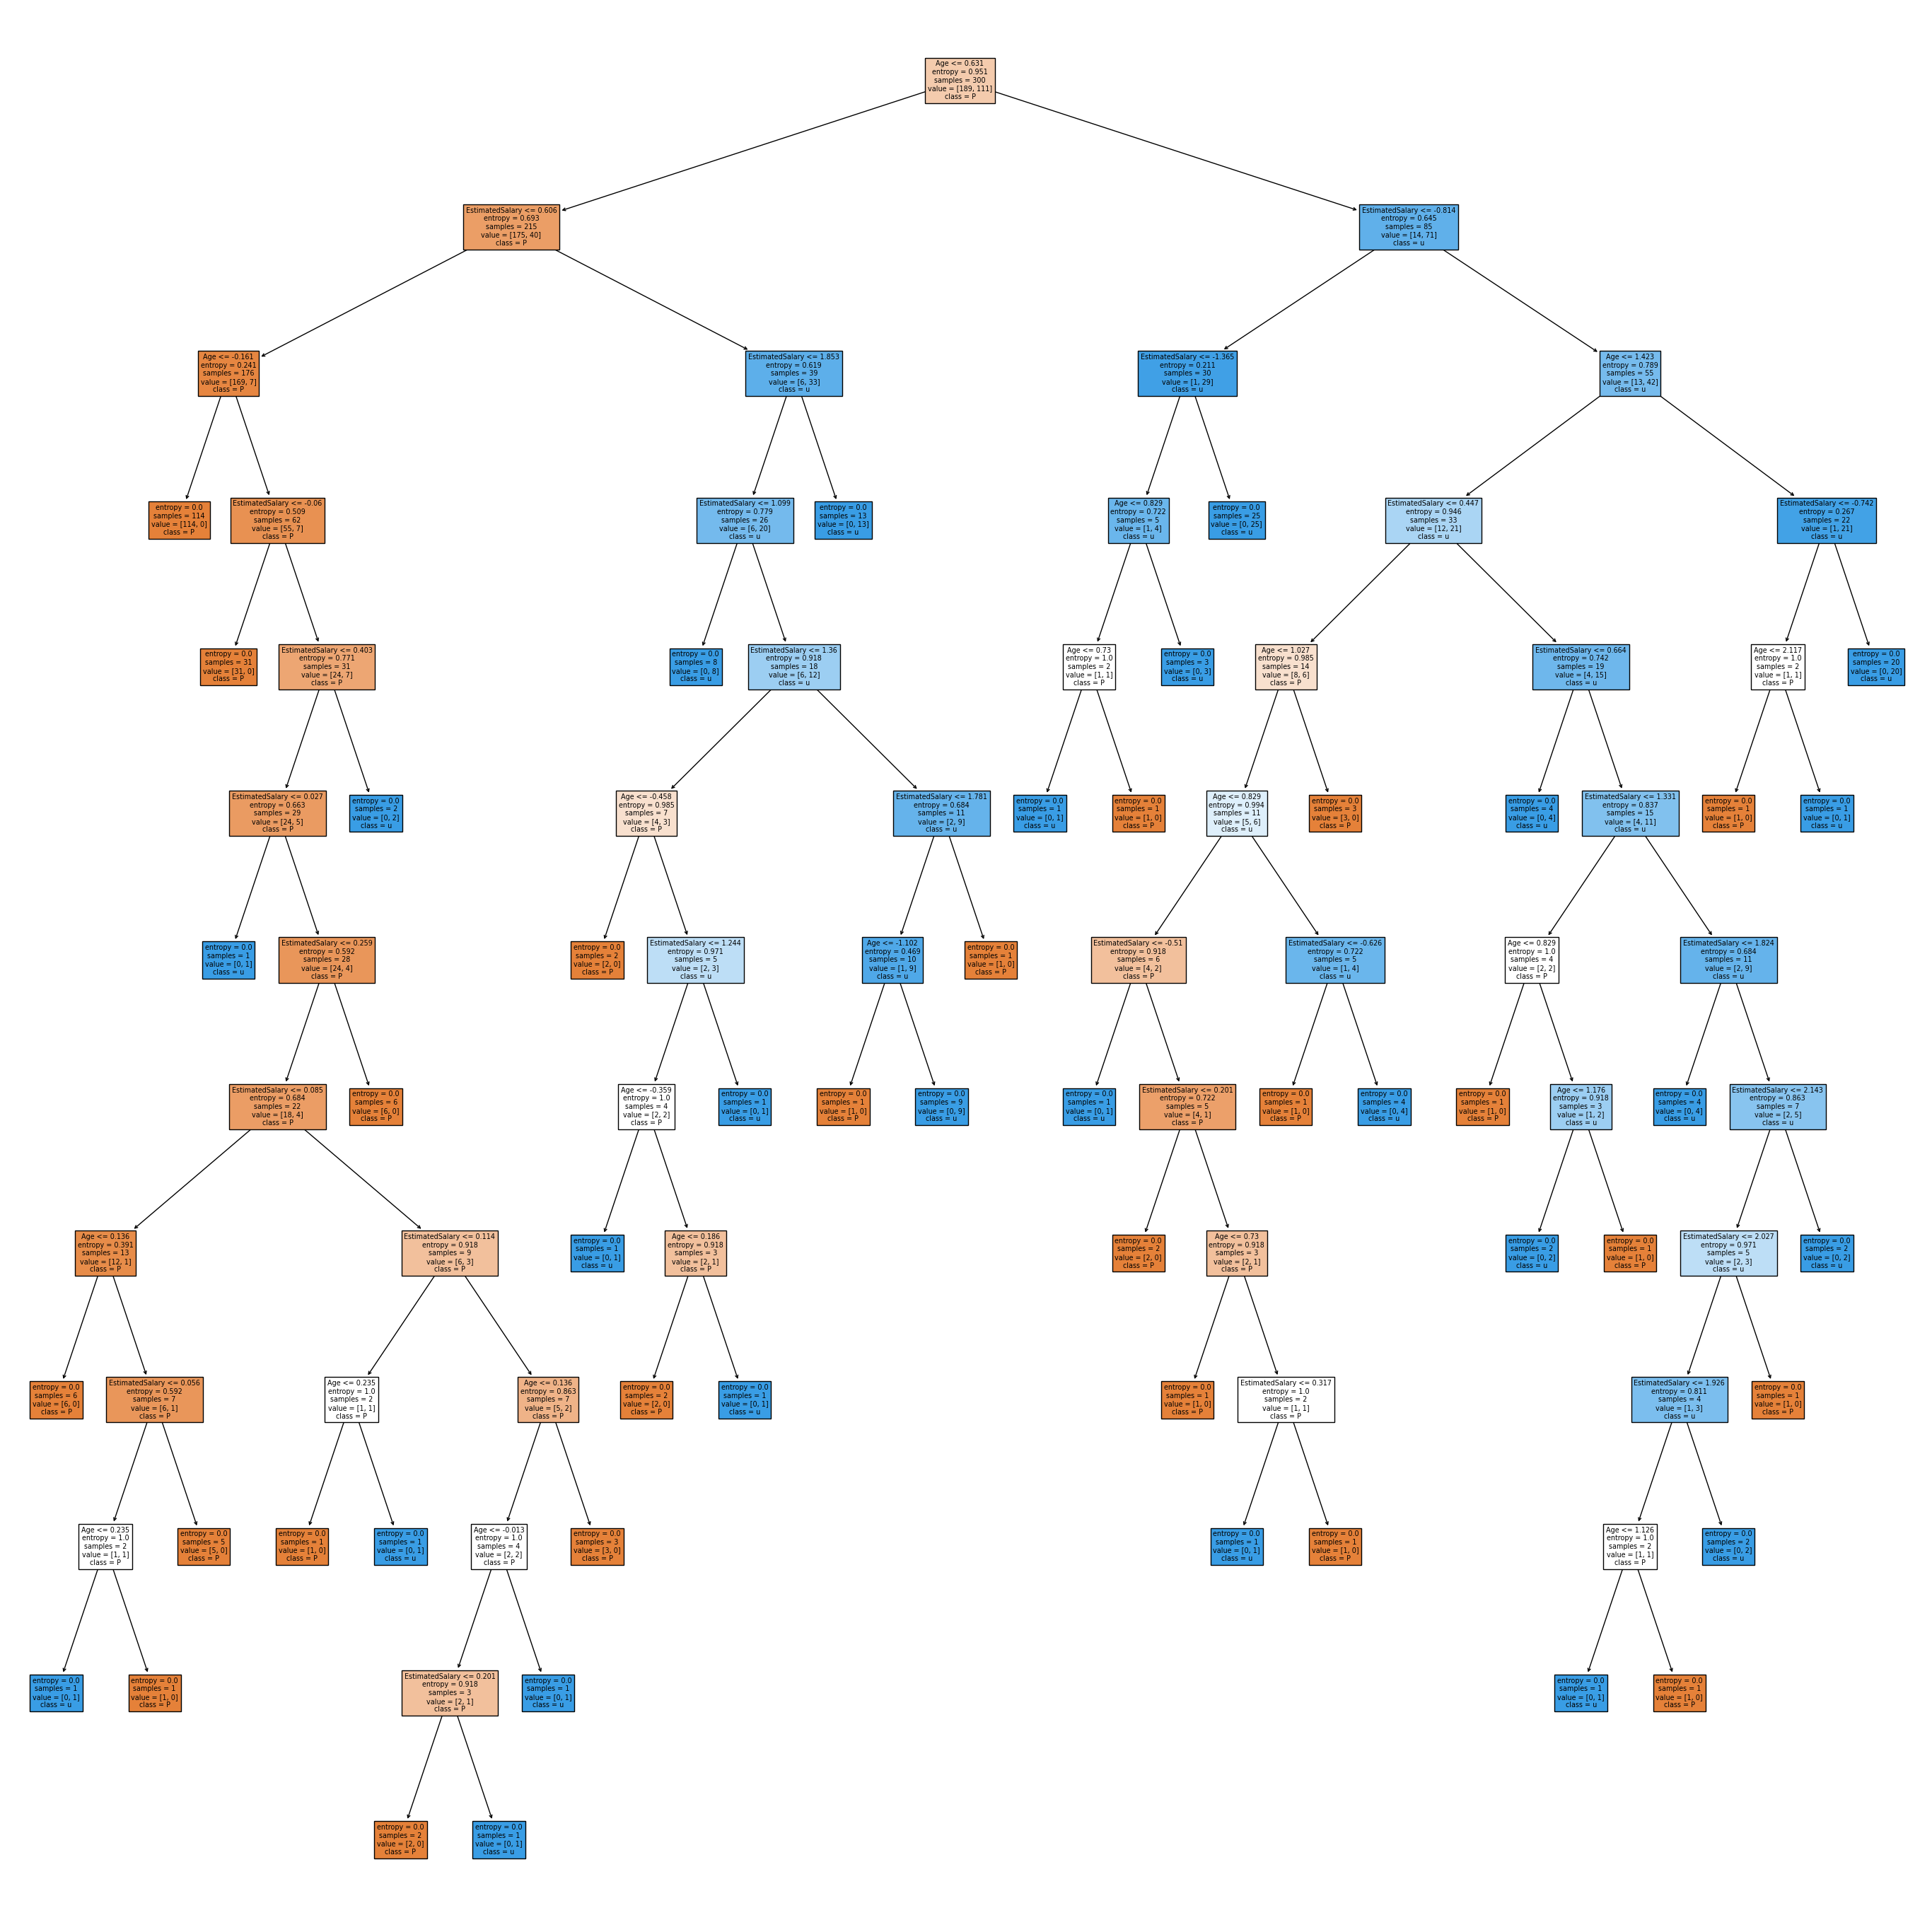

In [40]:
fig = plt.figure(figsize=(35, 35))
_ = tree.plot_tree(classifier,
                   feature_names=dataset.columns.to_list(),
                   class_names=list('Purchased'),
                   filled=True)
plt.show()

# Random Forest Classifier
- Ensemble learning with decision trees, grows many classification trees (commonly called as forest of trees)
- instead of building a single decision tree and use it to make predictions, build many slightly different trees and combine their predictions
-  produces good predictions that can be understood easily
- can handle large datasets efficiently
- provides a higher level of accuracy in predicting outcomes over the decision tree algorithm
- comaprable in accuracy to AdaBoost algorithm, but more robust to errors and outliers

# Constructing Random Forest
1. Forest-RI (Random Input Selection)
    - randomly select, at each node, F attributes as candidates for the split at the node
    - the CART methodology is used to grow the trees to maximum size
2. Forest-RC (Random Linear Combinations)
    - creates new attributes (or features) that are a linear combination of the existing attributes (reduces the correlation between individual classifiers)

# Obtaining Different trees
1. Bagging (BootStrap Aggregating)
    - taking a\random subsets of data points from the training set to create ```N``` smaller datasets
    - fit a decision tree on each subset
2. Random Subspace Method (Feature Bagging)
    - Fit ```N``` different decision trees by constraining each one to operate on a random subset of features

# Ensemble Learning
- method that combines multiple learning algorithms to obtain perfrormance improvements over its components
- e.g. Random Forest
- use a combination of models to increase accuracy
- combine  a series of ```k``` learned models , ```M1, M2, M3,.., Mk```, with the aim of creating an improved model ```M*```
- Simple Ensemble Learning Techniques
    1. Max Voting
        - used for classification problems
        - prediction from each of the different models is called a 'vote' and final prediction is the prediction which has the majority of votes
    2. Averaging
        - used for regression problems
        - multiple predictions are made for each data point in averaging
    3. Weighted Averaging
        - an extension of averaging method
        - all models are assigned diferent weights defining the importance of each model for prediction
- Advanced Ensemble Learning Methods
    1. Bagging
        - reduces variance by training multiple models independently on different subsets of training data and combining their predictions
        - multiple models on random subsets of data samples
        - averaging the prediction over a collection of classifiers
        - e.g.
            1. Random Forest
            2. Bagging meta-estimator
    3. Boosting
        - reduces bias by iteratively training weak learnersand focusing on misclassified data points to create a strong learner
        - train models iteratively, while making the current model focus on the mistakes of the previous ones by increasing the weight of misclassified samples
        - all the samples have same weight
        - weighted vote with a collection of classifiers
        
        - e.g.
            1. AdaBoost
            2. Gradient Boosting Method (GBM)
            3. Extreme Gradient Boosting Method (XGBM / XG Boost)
            4. Light GBM
            5. CatBoost
    3. Random Subspace Method
        - multiple models on random subsets of features
        1. Blending
        2. Stacking
            - create ```k``` subsets from the training datasetwith row samplomg with replacement
            - for each subset, train ```k``` weak models independently
            - these models are heterogeneous, means these models are of different types
            - take the predictions of each model, create a new training data set which will be used to train the meta model
        
    
    

### import libs

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset

In [42]:
# from google.colab import files
# uploaded = files.upload()
# D9data3.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [43]:
dataset = pd.read_csv('D9data3.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [44]:
dataset.shape

(400, 3)

In [45]:
dataset.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


### Identify X & Y

In [47]:
x = dataset.iloc[ : , :-1].values
# independent vars
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [48]:
y = dataset.iloc[ : , -1].values
# dependent vars
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Splitting

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [51]:
x_train[:5]

array([[    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000]], dtype=int64)

In [52]:
y_train[:5]

array([0, 1, 0, 1, 1], dtype=int64)

### PreProcessing

#### Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()

In [55]:
x_train = sc.fit_transform(x_train)
x_train[:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [56]:
x_test = sc.fit_transform(x_test)
x_test[:5]

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566]])

### Modeling

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)

### Training

In [59]:
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

### Prediction

In [60]:
y_pred_rf = classifier.predict(x_test)
y_pred_rf[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Evaluation for classifier

#### confusion_matrix

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test, y_pred_rf)

array([[63,  5],
       [ 3, 29]], dtype=int64)

#### classification_report

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        68
           1       0.85      0.91      0.88        32

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



#### accuracy_score

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test, y_pred_rf)

0.92

#### precision_score

In [67]:
from sklearn.metrics import precision_score

In [68]:
precision_score(y_test, y_pred_rf)

0.8529411764705882

#### recall_score

In [69]:
from sklearn.metrics import recall_score

In [70]:
recall_score(y_test, y_pred_rf)

0.90625

## Decision Tree as Classifier : iris dataset

### import libs

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset

In [72]:
from sklearn import datasets

In [73]:
iris = datasets.load_iris()

In [74]:
type(iris)

sklearn.utils._bunch.Bunch

### identify X & Y

In [75]:
x = iris.data
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [76]:
y = iris.target
y[:5]

array([0, 0, 0, 0, 0])

### splitting

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [79]:
x_train[:5]

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3]])

In [80]:
y_train[:5]

array([1, 1, 2, 0, 2])

### Modeling

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

### Training

In [83]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Prediction

In [84]:
y_pred_iris = classifier.predict(x_test)
y_pred_iris[:5]

array([2, 1, 0, 2, 0])

### Visualization

In [85]:
from sklearn import tree

#### export_text

In [86]:
text = tree.export_text(classifier)
print(text)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



#### plot_tree

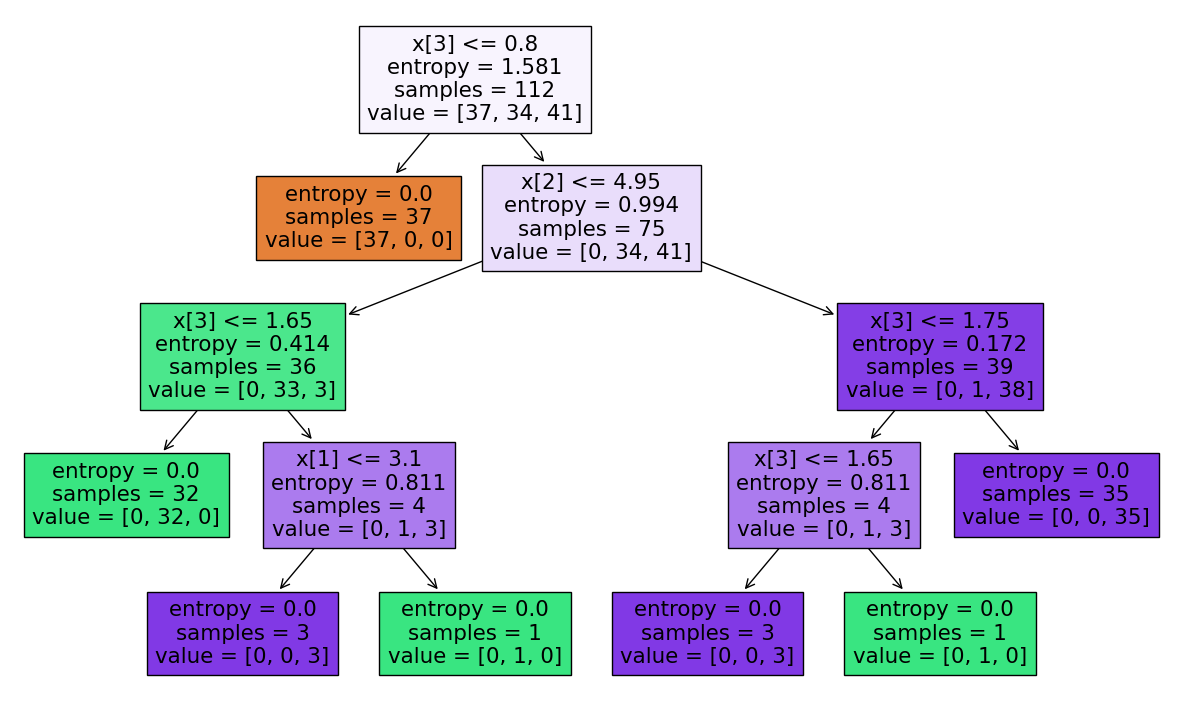

In [87]:
fig = plt.figure(figsize=(15, 9))
tree.plot_tree(classifier, filled=True)
plt.show()

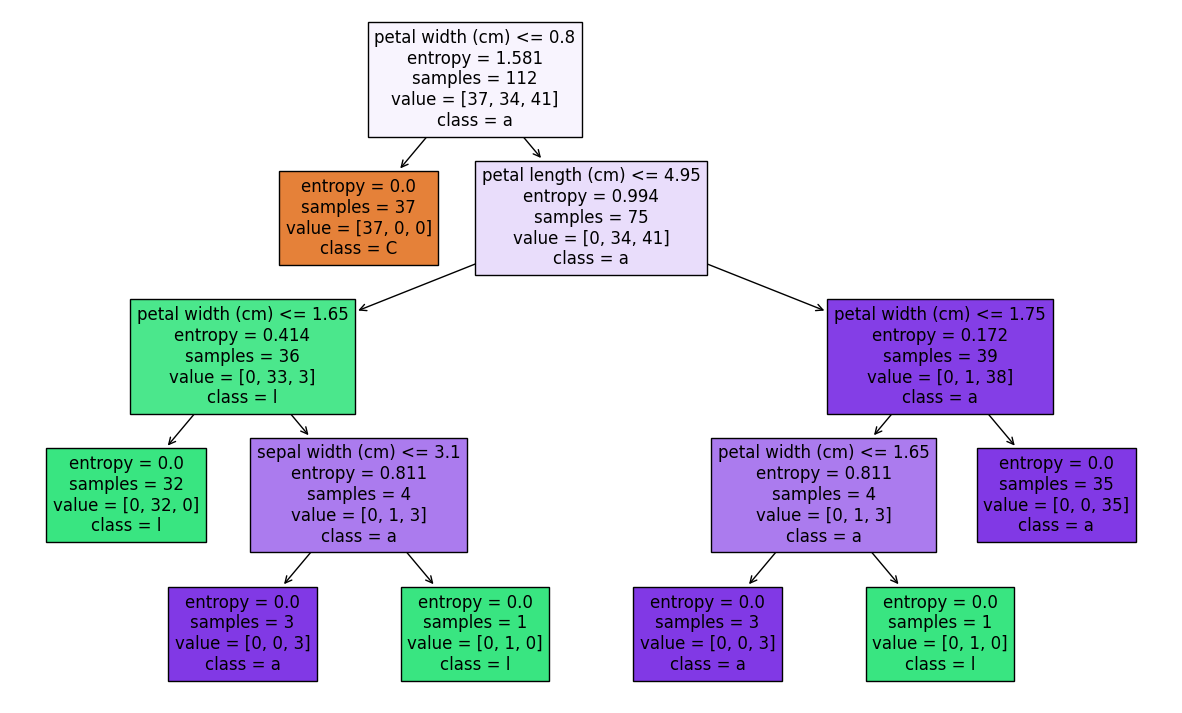

In [88]:
from sklearn import tree
fig = plt.figure(figsize=(15, 9))
_ = tree.plot_tree(classifier,
                   feature_names=iris.feature_names,
                   class_names=list('Class label'),
                   filled=True)
plt.show()

### Evaluation for Classifier

#### confusion_matrix

In [89]:
from sklearn.metrics import confusion_matrix

In [90]:
confusion_matrix(y_test, y_pred_iris)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

#### classification_report

In [91]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_test, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### accuracy_score

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(y_test, y_pred_iris)

0.9736842105263158

#### precision_score

In [95]:
from sklearn.metrics import precision_score

In [96]:
precision_score(y_test, y_pred_iris, average='weighted')

0.9763157894736842

#### recall_score

In [97]:
from sklearn.metrics import recall_score

In [98]:
recall_score(y_test, y_pred_iris, average='weighted')

0.9736842105263158

## Decision Tree as Regression : Boston Housing Dataset

### import libs

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset

In [100]:
# from google.colab import files
# uploaded = files.upload()
# D7data1.csv (Boston Housing Dataset)

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [101]:
dataset = pd.read_csv('D7data1.csv')
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [102]:
dataset.shape

(506, 14)

In [103]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### identify X & Y

In [105]:
x = dataset.iloc[ : , :-1].values
x[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [106]:
y = dataset.iloc[ : , -1].values
y[:2]

array([24. , 21.6])

### Splitting

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [109]:
x_train[:2]

array([[1.9133e-01, 2.2000e+01, 5.8600e+00, 0.0000e+00, 4.3100e-01,
        5.6050e+00, 7.0200e+01, 7.9549e+00, 7.0000e+00, 3.3000e+02,
        1.9100e+01, 3.8913e+02, 1.8460e+01],
       [1.0328e-01, 2.5000e+01, 5.1300e+00, 0.0000e+00, 4.5300e-01,
        5.9270e+00, 4.7200e+01, 6.9320e+00, 8.0000e+00, 2.8400e+02,
        1.9700e+01, 3.9690e+02, 9.2200e+00]])

In [110]:
y_train[:2]

array([18.5, 19.6])

### PreProcessing

#### Scaling

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
sc = StandardScaler()

In [113]:
x_train = sc.fit_transform(x_train)
x_train[:2]

array([[-0.3906002 ,  0.42637011, -0.74491444, -0.265747  , -1.07873298,
        -1.02196078,  0.05196998,  1.99457086, -0.27832777, -0.42799376,
         0.27878885,  0.34049624,  0.82212111],
       [-0.40127639,  0.5525335 , -0.84901832, -0.265747  , -0.88911932,
        -0.55696276, -0.76428645,  1.50565148, -0.16291614, -0.69685273,
         0.55287698,  0.42774893, -0.46241699]])

In [114]:
x_test = sc.fit_transform(x_test)
x_test[:2]

array([[-0.43519802, -0.45439168, -1.26783377, -0.29235267, -0.78632697,
         0.18268449, -1.8211624 ,  0.64596433, -0.67838241,  0.04282755,
        -0.69912236,  0.25657172, -0.81096958],
       [ 0.52696116, -0.45439168,  1.07087019, -0.29235267,  0.70236727,
         0.02084649,  1.14163218, -1.24711519,  1.59782806,  1.52678992,
         0.88810506,  0.1632353 , -0.49560953]])

### Modeling

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
regressor = DecisionTreeRegressor(max_depth=3, random_state=0)

### Training

In [117]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

### Prediction

In [118]:
y_pred_boston = regressor.predict(x_test)
y_pred_boston[:5]

array([24.74137931, 20.84351852, 20.84351852, 11.88135593, 20.84351852])

### Visualization

In [119]:
from sklearn import tree

#### export_text

In [120]:
text = tree.export_text(regressor)
print(text)

|--- feature_12 <= -0.61
|   |--- feature_5 <= 1.62
|   |   |--- feature_5 <= 0.50
|   |   |   |--- value: [24.74]
|   |   |--- feature_5 >  0.50
|   |   |   |--- value: [32.28]
|   |--- feature_5 >  1.62
|   |   |--- feature_10 <= -0.09
|   |   |   |--- value: [46.25]
|   |   |--- feature_10 >  -0.09
|   |   |   |--- value: [28.55]
|--- feature_12 >  -0.61
|   |--- feature_12 <= 0.34
|   |   |--- feature_5 <= 0.42
|   |   |   |--- value: [20.84]
|   |   |--- feature_5 >  0.42
|   |   |   |--- value: [26.85]
|   |--- feature_12 >  0.34
|   |   |--- feature_0 <= 0.29
|   |   |   |--- value: [16.58]
|   |   |--- feature_0 >  0.29
|   |   |   |--- value: [11.88]



#### plot_tree

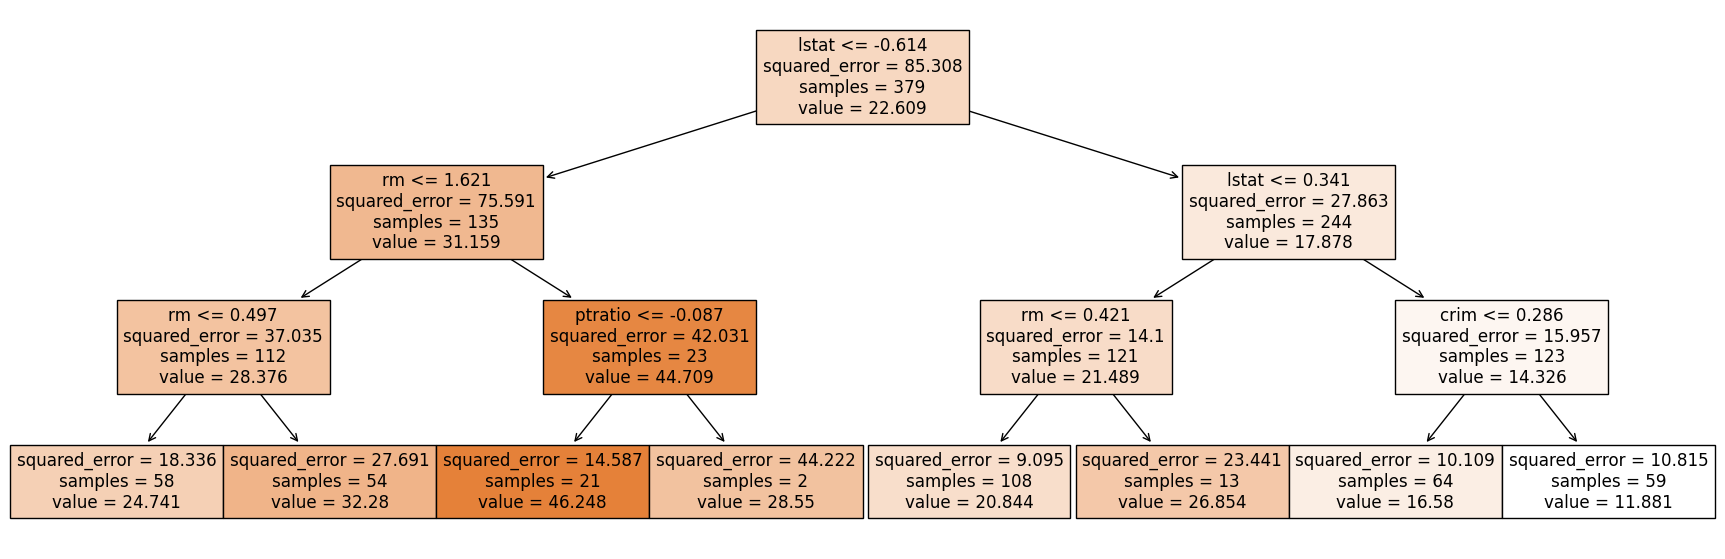

In [121]:
fig = plt.figure(figsize=(22, 7))
_ = tree.plot_tree(regressor,
                   feature_names=dataset.columns.to_list(),
                   filled=True)
plt.show()

### Evaluation for Regression

#### R-Square

In [122]:
from sklearn.metrics import r2_score

In [123]:
r2_score(y_test, y_pred_boston)

0.6181603859101792

#### mean_squared_error

In [124]:
from sklearn.metrics import mean_squared_error

In [125]:
mean_squared_error(y_test, y_pred_boston)

31.195920526376025